<a href="https://colab.research.google.com/github/dilaracakmakk/Makine-Ogrenmesi-Kullanilarak-Kumas-Kalite-Siniflandirmasi/blob/main/World-Happiness-Insights-2019-Regression-Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
df <- read.csv("2019.csv", stringsAsFactors = FALSE)
head(df)

,Overall.rank,Country.or.region,Score,GDP.per.capita,Social.support,Healthy.life.expectancy,Freedom.to.make.life.choices,Generosity,Perceptions.of.corruption
,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
2,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
3,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
4,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
5,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298
6,6,Switzerland,7.480,1.452,1.526,1.052,0.572,0.263,0.343


In [5]:
summary(df)
str(df)
colnames(df)
dim(df)

  Overall.rank    Country.or.region      Score       GDP.per.capita  
 Min.   :  1.00   Length:156         Min.   :2.853   Min.   :0.0000  
 1st Qu.: 39.75   Class :character   1st Qu.:4.545   1st Qu.:0.6028  
 Median : 78.50   Mode  :character   Median :5.380   Median :0.9600  
 Mean   : 78.50                      Mean   :5.407   Mean   :0.9051  
 3rd Qu.:117.25                      3rd Qu.:6.184   3rd Qu.:1.2325  
 Max.   :156.00                      Max.   :7.769   Max.   :1.6840  
 Social.support  Healthy.life.expectancy Freedom.to.make.life.choices
 Min.   :0.000   Min.   :0.0000          Min.   :0.0000              
 1st Qu.:1.056   1st Qu.:0.5477          1st Qu.:0.3080              
 Median :1.272   Median :0.7890          Median :0.4170              
 Mean   :1.209   Mean   :0.7252          Mean   :0.3926              
 3rd Qu.:1.452   3rd Qu.:0.8818          3rd Qu.:0.5072              
 Max.   :1.624   Max.   :1.1410          Max.   :0.6310              
   Generosity     Pe

'data.frame':	156 obs. of  9 variables:
 $ Overall.rank                : int  1 2 3 4 5 6 7 8 9 10 ...
 $ Country.or.region           : chr  "Finland" "Denmark" "Norway" "Iceland" ...
 $ Score                       : num  7.77 7.6 7.55 7.49 7.49 ...
 $ GDP.per.capita              : num  1.34 1.38 1.49 1.38 1.4 ...
 $ Social.support              : num  1.59 1.57 1.58 1.62 1.52 ...
 $ Healthy.life.expectancy     : num  0.986 0.996 1.028 1.026 0.999 ...
 $ Freedom.to.make.life.choices: num  0.596 0.592 0.603 0.591 0.557 0.572 0.574 0.585 0.584 0.532 ...
 $ Generosity                  : num  0.153 0.252 0.271 0.354 0.322 0.263 0.267 0.33 0.285 0.244 ...
 $ Perceptions.of.corruption   : num  0.393 0.41 0.341 0.118 0.298 0.343 0.373 0.38 0.308 0.226 ...


[1] "Overall.rank"                 "Country.or.region"           
[3] "Score"                        "GDP.per.capita"              
[5] "Social.support"               "Healthy.life.expectancy"     
[7] "Freedom.to.make.life.choices" "Generosity"                  
[9] "Perceptions.of.corruption"

[1] 156   9

In [9]:
sum(is.na(df))

[1] 0

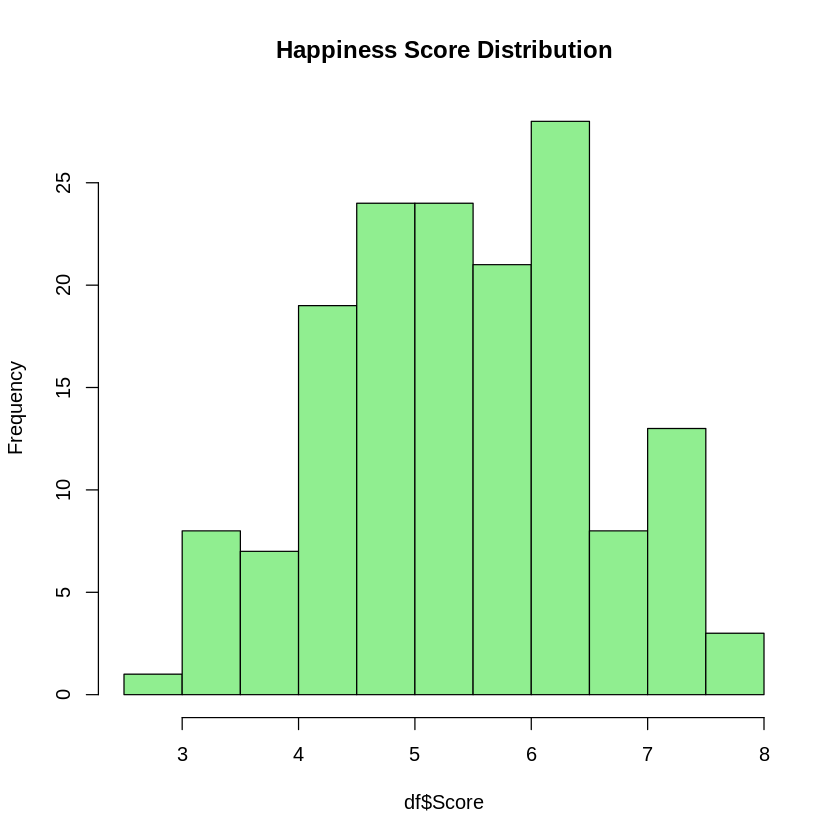

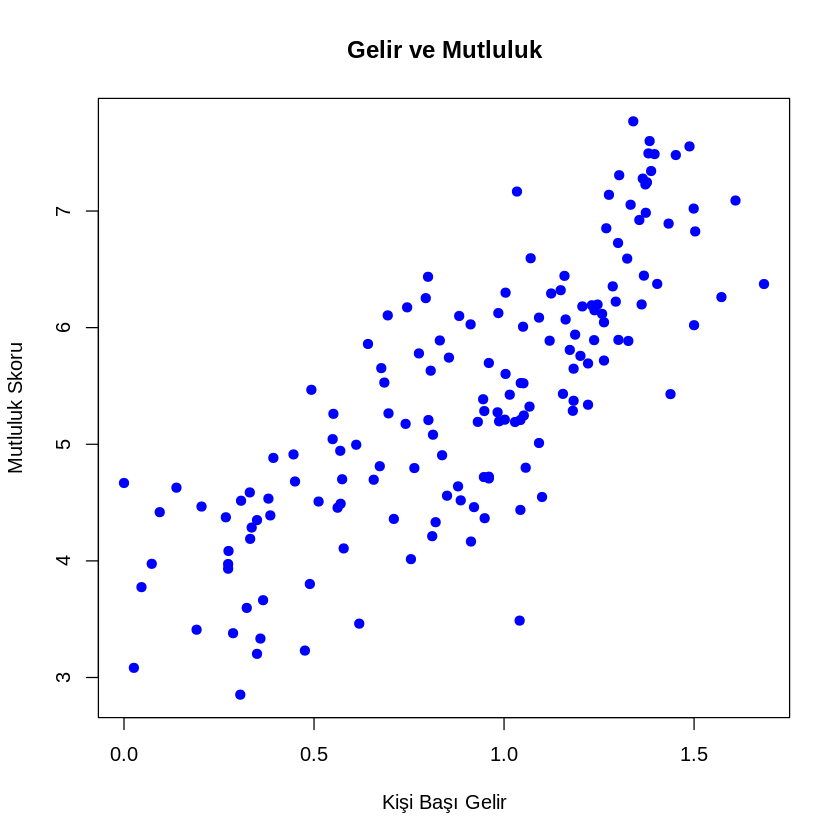

In [13]:
hist(df$Score, main = "Happiness Score Distribution", col = "lightgreen")


plot(df$GDP.per.capita, df$Score,
xlab = "Kişi Başı Gelir", ylab="Mutluluk Skoru",
main = "Gelir ve Mutluluk", pch=19, col="blue"
  )

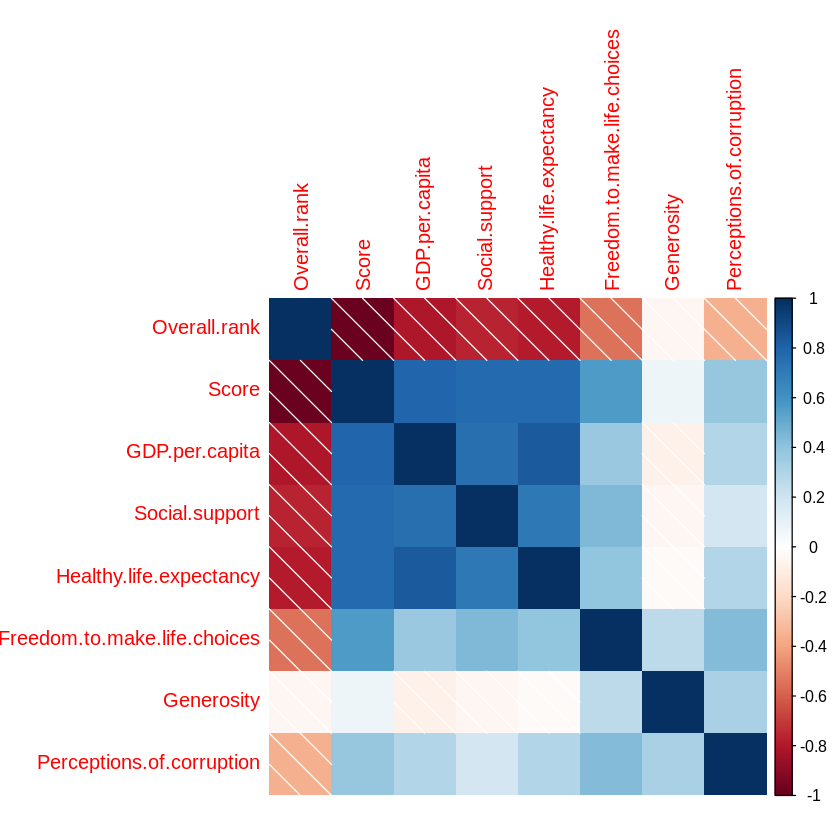

In [22]:
numeric_df <- df[sapply(df, is.numeric)]

cor_matrix <- cor(numeric_df, use = "complete.obs")

library(corrplot)
corrplot(cor_matrix, method = "shade")

In [4]:
model <- lm(Score ~ GDP.per.capita + Social.support + Healthy.life.expectancy +
              Freedom.to.make.life.choices + Generosity + Perceptions.of.corruption,
            data = df
            )

summary(model)



Call:
lm(formula = Score ~ GDP.per.capita + Social.support + Healthy.life.expectancy + 
    Freedom.to.make.life.choices + Generosity + Perceptions.of.corruption, 
    data = df)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.75304 -0.35306  0.05703  0.36695  1.19059 

Coefficients:
                             Estimate Std. Error t value Pr(>|t|)    
(Intercept)                    1.7952     0.2111   8.505 1.77e-14 ***
GDP.per.capita                 0.7754     0.2182   3.553 0.000510 ***
Social.support                 1.1242     0.2369   4.745 4.83e-06 ***
Healthy.life.expectancy        1.0781     0.3345   3.223 0.001560 ** 
Freedom.to.make.life.choices   1.4548     0.3753   3.876 0.000159 ***
Generosity                     0.4898     0.4977   0.984 0.326709    
Perceptions.of.corruption      0.9723     0.5424   1.793 0.075053 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.5335 on 149 degrees of freedom
Multiple R-squa

In [6]:
head(df[order(-df$Score), c("Country.or.region", "Score")],10)


,Country.or.region,Score
,<chr>,<dbl>
1,Finland,7.769
2,Denmark,7.600
3,Norway,7.554
4,Iceland,7.494
5,Netherlands,7.488
6,Switzerland,7.480
7,Sweden,7.343
8,New Zealand,7.307
9,Canada,7.278


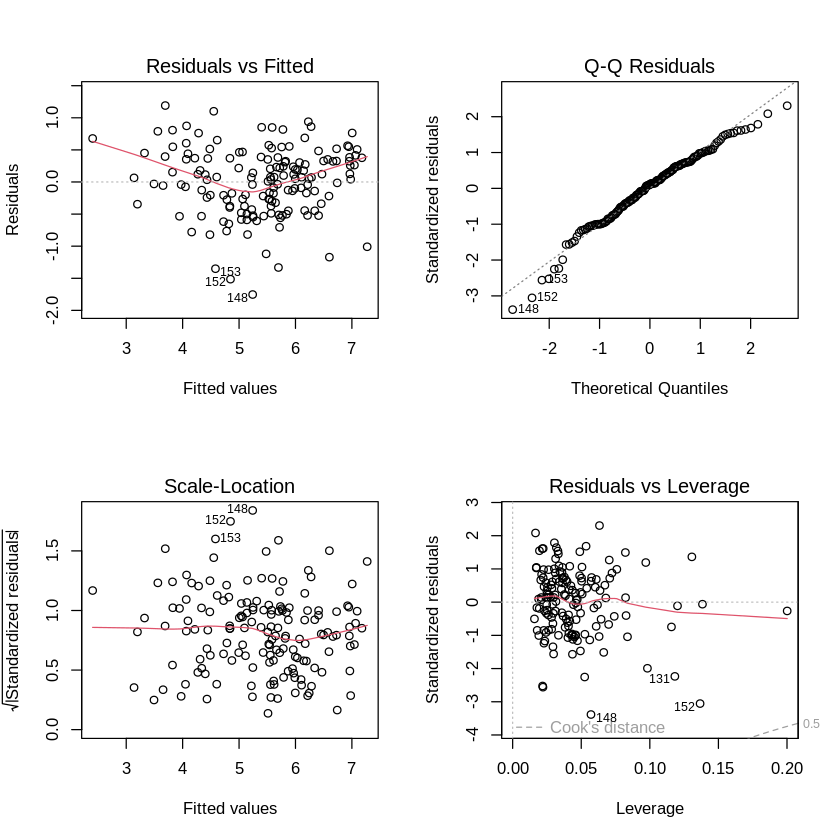

In [8]:
par(mfrow = c(2, 2))
plot(model)